In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
path_to_traces = "/home/caran948/datasets/ecg-traces/preprocessed/traces15pc.hdf5"
path_to_csv = "/home/theha123/af-risk-prediction-by-ecg-dnn/out/exams_info.csv"
ids_col = "id_exam"
class_col = "exam_class"

ids_dset = "id_exam"
traces_dset = "signal"

n_valid = 105000

In [3]:
 # Get csv data
df = pd.read_csv(path_to_csv, index_col=ids_col)
df.head(10)

,Unnamed: 0,id_patient,age,sex,1dAVb,RBBB,LBBB,SB,AF,ST,date_exam,group_exam,exam_class,time_to_first_appearance,time_to_last_exam,split
id_exam,,,,,,,,,,,,,,,,
2111789,1776640,1372330,55,M,0,0,0,0,0,0,2017-06-02,1,0,0,0,none
2111102,1776430,1580011,57,M,0,0,0,0,0,0,2017-06-02,1,0,0,0,none
2111069,1776422,819200,82,F,0,0,0,0,1,0,2017-06-02,2,2,0,0,train
2111070,1776423,158514,52,F,0,0,0,0,0,0,2017-06-02,1,0,0,0,none
2111074,1776424,652452,38,M,0,0,0,0,0,0,2017-06-02,1,0,0,0,none
2111076,1776425,812447,62,M,0,0,0,0,0,0,2017-06-02,1,0,0,0,none
2111080,1776426,551306,51,M,0,0,0,0,0,0,2017-06-02,1,0,0,0,none
2111085,1776427,581332,20,M,0,0,0,0,0,0,2017-06-02,1,0,0,0,none
2111097,1776428,1499636,63,F,0,0,0,0,0,0,2017-06-02,1,0,0,0,none


In [6]:
df[["age", "AF", "group_exam", "exam_class","time_to_first_appearance", "time_to_last_exam"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2322513.0,53.633508,17.418323,17.0,41.0,54.0,67.0,104.0
AF,2322513.0,0.018020,0.133024,0.0,0.0,0.0,0.0,1.0
group_exam,2322513.0,0.572330,0.596347,0.0,0.0,1.0,1.0,3.0
exam_class,2322513.0,0.326403,0.536310,0.0,0.0,0.0,1.0,3.0
time_to_first_appearance,2322513.0,0.485657,8.655643,0.0,0.0,0.0,0.0,376.0
time_to_last_exam,2322513.0,27.067452,59.514227,0.0,0.0,0.0,11.0,385.0


In [8]:
classes = df[class_col]
classes_count = classes.value_counts()

In [36]:
#classes_count.plot(kind='bar')

In [32]:
df_classes = pd.DataFrame(data=classes_count.values,  columns=['counts'], index=['0','1','2','3'])
# add a percent column
df_classes['%'] = df_classes.counts.div(df_classes.counts.sum()).mul(100).round(2)
display(df_classes)

,counts,%
0,1630850,70.22
1,637531,27.45
2,41852,1.80
3,12280,0.53


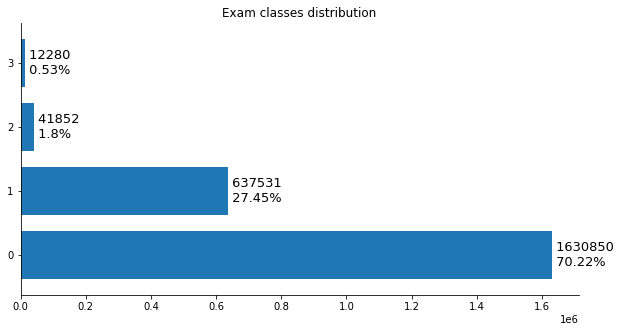

In [35]:
# Plotting the classes distribution

ax = df_classes.plot(kind='barh', y='counts', figsize=(10, 5), legend=False, width=.75,
             title='Exam classes distribution')

# customize the label to include the percent
labels = [f' {v.get_width()}\n {df_classes.iloc[i, 1]}%' for i, v in enumerate(ax.containers[0])]

# set the bar label
ax.bar_label(ax.containers[0], labels=labels, label_type='edge', size=13)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### Get classes distribution for CODE-15% dataset and for training data

In [37]:
f = h5py.File(path_to_traces, 'r')

In [41]:
h5ids = f[ids_dset]
# keep samples with ids that are in CODE-15% dataset
df = df.reindex(h5ids, fill_value=False, copy=True)
af_classes = df[class_col]
print(len(h5ids))


345779


In [44]:
af_classes_count = af_classes.value_counts()
display(af_classes_count)

0    244482
1     92270
2      7033
3      1994
Name: exam_class, dtype: int64

In [49]:
def plot_distribution(class_series, index, title='Classes distribution'):
    """Plot a bar plot of classes and their counts"""
    
    df_cl = pd.DataFrame(data=class_series.values,  columns=['counts'], index=index)
    # add a percent column
    df_cl['%'] = df_cl.counts.div(df_cl.counts.sum()).mul(100).round(2)
    
    #plot classes distribution
    ax = df_cl.plot(kind='barh', y='counts', figsize=(10, 5), legend=False, width=.59,
             title=title)

    # customize the label to include the percent
    labels = [f' {v.get_width()}\n {df_cl.iloc[i, 1]}%' for i, v in enumerate(ax.containers[0])]

    # set the bar label
    ax.bar_label(ax.containers[0], labels=labels, label_type='edge', size=13)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()
    

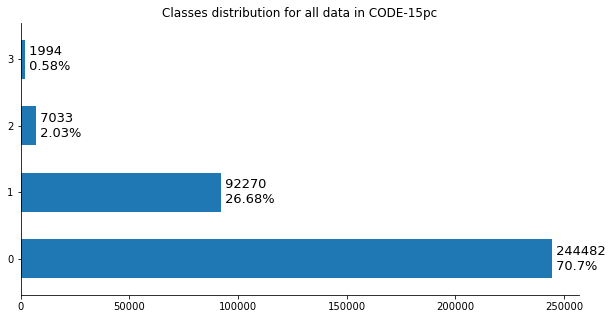

In [50]:
# Plot distribution for all data in CODE-15pc
index_15 = ['0','1','2','3']
title_15 = 'Classes distribution for all data in CODE-15pc'
plot_distribution(af_classes_count, index_15, title_15)

In [51]:
# distribution for training data
mask_classes = (df[class_col] != 0).to_numpy()
mask_classes[:10]

array([False, False,  True, False, False,  True, False,  True, False,
        True])

In [53]:
df[class_col][:10]

590673     0
214626     0
2936711    1
1175521    0
1073151    0
223229     1
3009086    0
625648     1
218333     0
1281753    1
Name: exam_class, dtype: int64

In [55]:
train_mask_0 = np.arange(len(df)) >= n_valid
train_mask = train_mask_0 & mask_classes

In [65]:
train_df = df[train_mask]
len(train_df)

68348

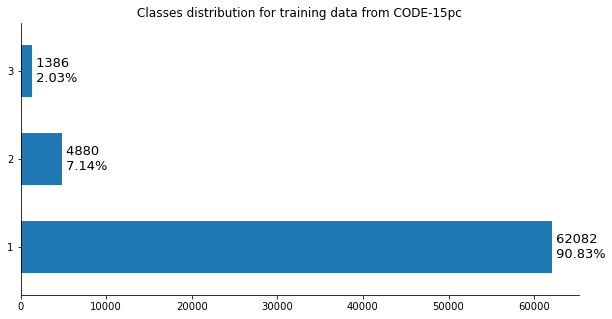

In [69]:
train_classes = train_df[class_col]
train_classes_count = train_classes.value_counts()
# Ploting class distribution
index_tr = ['1','2','3']
title_tr = 'Classes distribution for training data from CODE-15pc'
plot_distribution(train_classes_count, index_tr, title_tr)

In [70]:
valid_mask_0 = (np.arange(len(df)) >= 70000) & (np.arange(len(df)) < n_valid)
valid_mask = valid_mask_0 & mask_classes 


In [71]:
valid_df = df[valid_mask]
len(valid_df)

10902

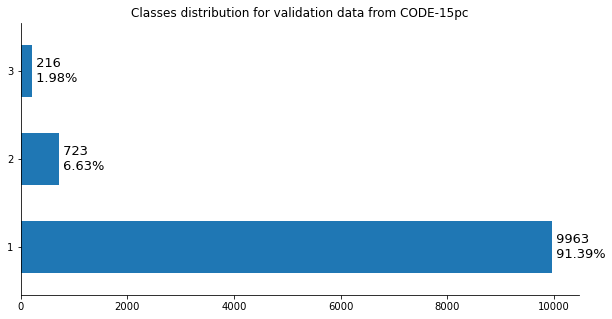

In [72]:
valid_classes = valid_df[class_col]
valid_classes_count = valid_classes.value_counts()
# Ploting class distribution
index_val = ['1','2','3']
title_val = 'Classes distribution for validation data from CODE-15pc'
plot_distribution(valid_classes_count, index_val, title_val)

#### Distribution classes for test data

In [78]:
test_mask = (np.arange(len(df)) <= 70000) & mask_classes 
test_df = df[test_mask]
len(test_df)

22047

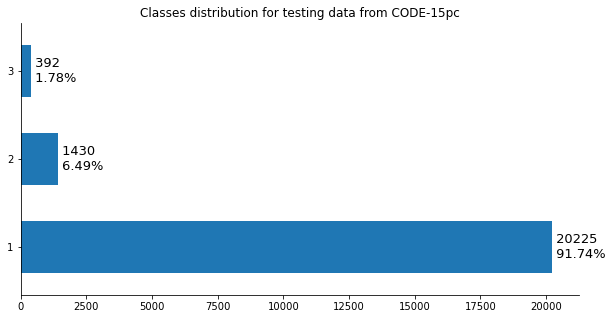

In [79]:
test_classes = test_df[class_col]
test_classes_count = test_classes.value_counts()
# Ploting class distribution
index_test = ['1','2','3']
title_test = 'Classes distribution for testing data from CODE-15pc'
plot_distribution(test_classes_count, index_test, title_test)